# <font color=blue>Statistical Thinking in Python (Part 2)</font> 

After completing Statistical Thinking in Python (Part 1), you have the probabilistic mindset and foundational hacker stats skills to dive into data sets and extract useful information from them. In this course, you will do just that, expanding and honing your hacker stats toolbox to perform the two key tasks in statistical inference, parameter estimation and hypothesis testing. You will work with real data sets as you learn, culminating with analysis of measurements of the beaks of the Darwin's famous finches. You will emerge from this course with new knowledge and lots of practice under your belt, ready to attack your own inference problems out in the world.

## <font color=red>01 -  Parameter estimation by optimization </font> 

 When doing statistical inference, we speak the language of probability. A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it. In this chapter, you will learn how to find the optimal parameters, those that best describe your data. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter("ignore")
plt.figure(figsize= (10,8), dpi=1000)

<Figure size 10000x8000 with 0 Axes>

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">How often do we get no-hitters?</h1><p>The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array <code>nohitter_times</code>. </p>
<p>If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-4-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03C4;</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-4" style="width: 0.644em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.534em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.759em, 1000.53em, 2.524em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-5"><span class="mi" id="MathJax-Span-6" style="font-family: MathJax_Math; font-style: italic;">τ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.08em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.078em; border-left: 0px solid; width: 0px; height: 0.644em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>τ</mi></math></span></span><script type="math/tex" id="MathJax-Element-4">\tau</script>, the typical interval time. The value of the parameter <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-5-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03C4;</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-7" style="width: 0.644em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.534em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.759em, 1000.53em, 2.524em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-8"><span class="mi" id="MathJax-Span-9" style="font-family: MathJax_Math; font-style: italic;">τ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.08em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.078em; border-left: 0px solid; width: 0px; height: 0.644em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>τ</mi></math></span></span><script type="math/tex" id="MathJax-Element-5">\tau</script> that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters. </p>
<p>Compute the value of this parameter from the data. Then, use <code>np.random.exponential()</code> to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-6-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03C4;</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-10" style="width: 0.644em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.534em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.759em, 1000.53em, 2.524em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-11"><span class="mi" id="MathJax-Span-12" style="font-family: MathJax_Math; font-style: italic;">τ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.08em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.078em; border-left: 0px solid; width: 0px; height: 0.644em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>τ</mi></math></span></span><script type="math/tex" id="MathJax-Element-6">\tau</script> you found and plot the histogram as an approximation to the PDF.</p>
<p>NumPy, pandas, matlotlib.pyplot, and seaborn have been imported for you as <code>np</code>, <code>pd</code>, <code>plt</code>, and <code>sns</code>, respectively.</p></div></div></div>

In [2]:
games = pd.read_csv('./data/mlb_nohitters_1900_2015.csv')
games_list = games.game_number.values
nohitter_times = []
for i in range(1,len(games_list)):
    nohitter_times.append(games_list[i]-games_list[i-1]-1)
nohitter_times = np.array(nohitter_times)

In [3]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

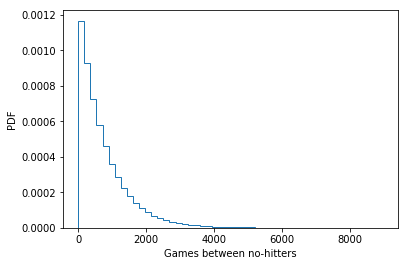

In [4]:
# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins = 50, normed=True, histtype = 'step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Do the data follow our story?</h1><p>You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.</p>
<p>It may be helpful to remind yourself of the <a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/graphical-exploratory-data-analysis?ex=12" target="_blank">function you created in the previous course</a> to compute the ECDF, as well as the code you wrote to <a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/graphical-exploratory-data-analysis?ex=13" target="_blank">plot it</a>.</p></div>

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

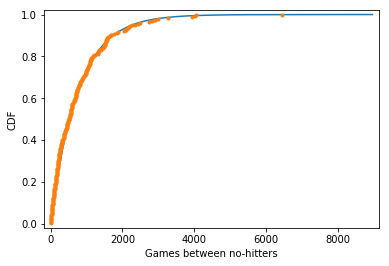

In [6]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">How is this parameter optimal?</h1><p>Now sample out of an exponential distribution with <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-7-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03C4;</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-13" style="width: 0.644em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.534em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.759em, 1000.53em, 2.524em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-14"><span class="mi" id="MathJax-Span-15" style="font-family: MathJax_Math; font-style: italic;">τ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.08em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.078em; border-left: 0px solid; width: 0px; height: 0.644em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>τ</mi></math></span></span><script type="math/tex" id="MathJax-Element-7">\tau</script> being twice as large as the optimal <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-8-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03C4;</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-16" style="width: 0.644em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.534em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.759em, 1000.53em, 2.524em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-17"><span class="mi" id="MathJax-Span-18" style="font-family: MathJax_Math; font-style: italic;">τ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.08em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.078em; border-left: 0px solid; width: 0px; height: 0.644em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>τ</mi></math></span></span><script type="math/tex" id="MathJax-Element-8">\tau</script>. Do it again for <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-9-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03C4;</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-19" style="width: 0.644em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.534em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.759em, 1000.53em, 2.524em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-20"><span class="mi" id="MathJax-Span-21" style="font-family: MathJax_Math; font-style: italic;">τ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.08em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.078em; border-left: 0px solid; width: 0px; height: 0.644em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>τ</mi></math></span></span><script type="math/tex" id="MathJax-Element-9">\tau</script> half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-10-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03C4;</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-22" style="width: 0.644em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.534em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.759em, 1000.53em, 2.524em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-23"><span class="mi" id="MathJax-Span-24" style="font-family: MathJax_Math; font-style: italic;">τ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.08em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.078em; border-left: 0px solid; width: 0px; height: 0.644em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>τ</mi></math></span></span><script type="math/tex" id="MathJax-Element-10">\tau</script> you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.</p>
<p><em>Note</em>: In this and all subsequent exercises, the random number generator is pre-seeded for you to save you some typing.</p></div></div></div>

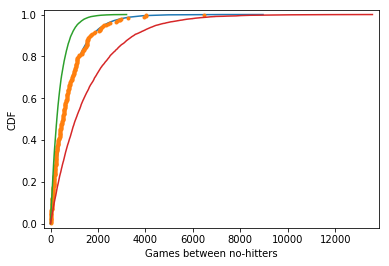

In [7]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000 )

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000 )

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

Great work! Notice how the value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">EDA of literacy/fertility data</h1><p>In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the <em>il</em>literacy rate.</p>
<p>It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array <code>illiteracy</code> has the illiteracy rate among females for most of the world's nations. The array <code>fertility</code> has the corresponding fertility data.</p>
<p>Here, it may be useful to refer back to the <a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/quantitative-exploratory-data-analysis?ex=15" target="_blank">function you wrote in the previous course</a> to compute the Pearson correlation coefficient.</p></div>

In [8]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [9]:
df = pd.read_csv('./data/female_literacy_fertility.csv')
fertility = df.fertility.values
illiteracy = 100- df['female literacy'].values

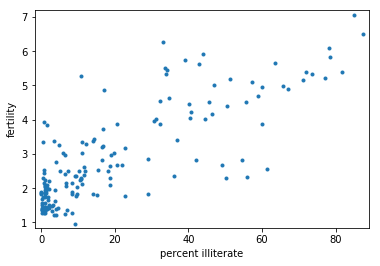

0.8041324026815346


In [10]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

You can see the correlation between illiteracy and fertility by eye, and by the substantial Pearson correlation coefficient of 0.8. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Linear regression</h1><p>We will assume that fertility is a linear function of the female illiteracy rate. That is, <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-16-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>f</mi><mo>=</mo><mi>a</mi><mi>i</mi><mo>+</mo><mi>b</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-57" style="width: 5.184em; display: inline-block;"><span style="display: inline-block; position: relative; width: 4.434em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.485em, 1004.43em, 2.716em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-58"><span class="mi" id="MathJax-Span-59" style="font-family: MathJax_Math; font-style: italic;">f<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.06em;"></span></span><span class="mo" id="MathJax-Span-60" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mi" id="MathJax-Span-61" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.278em;">a</span><span class="mi" id="MathJax-Span-62" style="font-family: MathJax_Math; font-style: italic;">i</span><span class="mo" id="MathJax-Span-63" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="mi" id="MathJax-Span-64" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.222em;">b</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.302em; border-left: 0px solid; width: 0px; height: 1.19em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi><mo>=</mo><mi>a</mi><mi>i</mi><mo>+</mo><mi>b</mi></math></span></span><script type="math/tex" id="MathJax-Element-16">f = a i + b</script>, where <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-17-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>a</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-65" style="width: 0.644em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.534em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.749em, 1000.51em, 2.521em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-66"><span class="mi" id="MathJax-Span-67" style="font-family: MathJax_Math; font-style: italic;">a</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.074em; border-left: 0px solid; width: 0px; height: 0.653em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>a</mi></math></span></span><script type="math/tex" id="MathJax-Element-17">a</script> is the slope and <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-18-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>b</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-68" style="width: 0.537em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.427em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.496em, 1000.42em, 2.522em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-69"><span class="mi" id="MathJax-Span-70" style="font-family: MathJax_Math; font-style: italic;">b</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.075em; border-left: 0px solid; width: 0px; height: 0.95em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>b</mi></math></span></span><script type="math/tex" id="MathJax-Element-18">b</script> is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using <code>np.polyfit()</code>.</p>
<p>Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)</p></div></div></div>

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


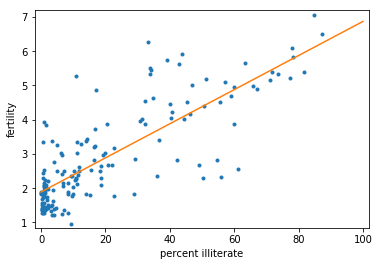

In [11]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">How is it optimal?</h1><p>The function <code>np.polyfit()</code> that you used to get your regression parameters finds the <em>optimal</em> slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter <code>a</code>. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?</p></div></div></div>

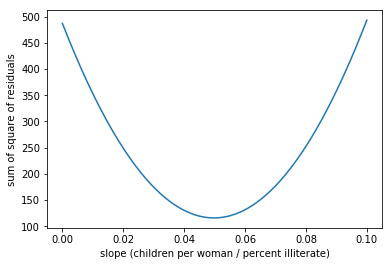

In [12]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

Great work! Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression.

<div class=""><div><p>Why should exploratory data analysis be the first step in an analysis of data (after getting your data imported and cleaned, of course)?</p></div></div>

- You can be protected from misinterpretation of the type demonstrated by Anscombe's quartet.

- EDA provides a good starting point for planning the rest of your analysis.
press

- EDA is not really any more difficult than any of the subsequent analysis, so there is no excuse for not exploring the data.
press

- **All of these reasons!**

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Linear regression on appropriate Anscombe data</h1><p>For practice, perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.</p></div></div></div>

In [13]:
x = np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.])
y = np.array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26, 10.84,   4.82,   5.68])

In [14]:
# Perform linear regression: a, b
a, b = np.polyfit(x,y,1)

# Print the slope and intercept
print(a, b)

0.5000909090909091 3.000090909090908


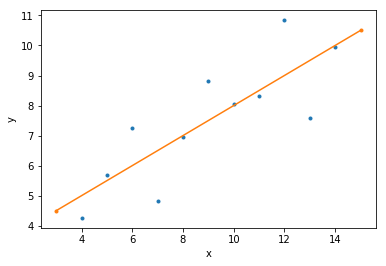

In [15]:
# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = x_theor * a + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x,y, marker='.', linestyle='none')
_ = plt.plot(x_theor,y_theor, marker='.', linestyle = '-')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [16]:
anscombe = pd.read_csv('./data/anscombe.csv')
anscombe_x = [anscombe.x1.values, anscombe.x2.values,anscombe.x3.values,anscombe.x4.values]
anscombe_y = [anscombe.y1.values, anscombe.y2.values,anscombe.y3.values,anscombe.y4.values]

In [17]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x , anscombe_y ):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y,1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909091 intercept: 3.000090909090908
slope: 0.5 intercept: 3.0009090909090905
slope: 0.4997272727272729 intercept: 3.002454545454545
slope: 0.4999090909090908 intercept: 3.001727272727274


## <font color=red>02 - Bootstrap confidence intervals </font> 

 To "pull yourself up by your bootstraps" is a classic idiom meaning that you achieve a difficult task by yourself with no help at all. In statistical inference, you want to know what would happen if you could repeat your data acquisition an infinite number of times. This task is impossible, but can we use only the data we actually have to get close to the same result as an infinitude of experiments? The answer is yes! The technique to do it is aptly called bootstrapping. This chapter will introduce you to this extraordinarily powerful tool. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visualizing bootstrap samples</h1><p>In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array <code>rainfall</code> in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.</p></div></div></div>

In [18]:
rain = pd.read_csv('./data/sheffield_weather_station.csv')
rainfall = rain.groupby(by ='yyyy').sum().rain.values

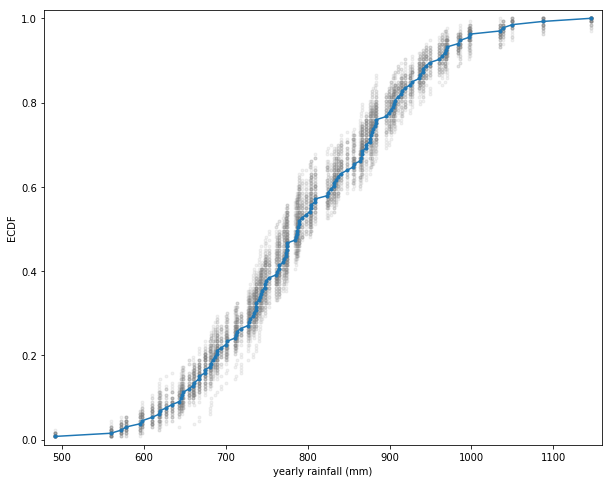

In [19]:

plt.figure(figsize=(10, 8))
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes


plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

Good job! Notice how the bootstrap samples give an idea of how the distribution of rainfalls is spread.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Generating many bootstrap replicates</h1><p>The function <code>bootstrap_replicate_1d()</code> from the video is available in your namespace. Now you'll write another function, <code>draw_bs_reps(data, func, size=1)</code>, which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.</p>
<p>For your reference, the <code>bootstrap_replicate_1d()</code> function is provided below:</p>
<pre><code class="{python} language-{python}">def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
</code></pre></div></div></div>

In [20]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [21]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Bootstrap replicates of the mean and the SEM</h1><p>In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a <em>probabilistic</em> estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.</p>
<p>In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the <strong>standard error of the mean</strong>, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, <code>sem = np.std(data) / np.sqrt(len(data))</code>. Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.</p>
<p>The dataset has been pre-loaded for you into an array called <code>rainfall</code>.</p></div></div></div>

10.51054915050619
10.358764199574095


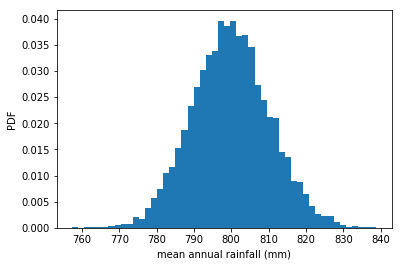

In [22]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Great work! Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Bootstrap replicates of other statistics</h1><p>We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.</p>
<p>Here, you will make use of the <code>draw_bs_reps()</code> function <a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=6" target="_blank">you defined a few exercises ago</a>. It is provided below for your reference:</p>
<pre><code class="{python} language-{python}">def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])
</code></pre></div></div></div>

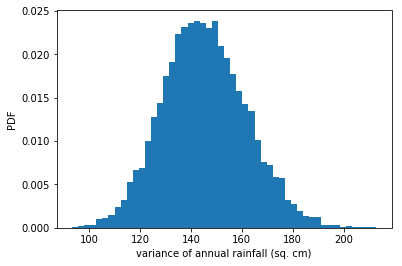

In [23]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins = 50 ,normed = True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

<div><p>Great work! This is not normally distributed, as it has a longer tail to the right. Note that you can also compute a confidence interval on the variance, or any other statistic, using <code>np.percentile()</code> with your bootstrap replicates.</p></div>

In [24]:
np.percentile(bs_replicates, [2.5, 97.5])

array([114.96790367, 179.21347566])

In [25]:
np.mean(bs_replicates)

145.48703758643225

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Confidence interval on the rate of no-hitters</h1><p>Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter <span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-1"><span class="MJXp-mrow" id="MJXp-Span-2"><span class="MJXp-mo" id="MJXp-Span-3" style="margin-left: 0.278em; margin-right: 0.278em;"></span></span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-4">τ</span></span></span><span class="MathJax MathJax_Processing" id="MathJax-Element-1-Frame" tabindex="0" style=""></span><script type="math/tex" id="MathJax-Element-1">\tau</script>. Plot a histogram of your replicates and report a 95% confidence interval.</p></div></div></div>

95% confidence interval = [663.65229084 869.79741036] games


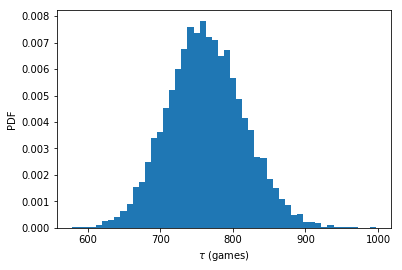

In [26]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

This gives you an estimate of what the typical time between no-hitters is. It could be anywhere between 660 and 870 games.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">A function to do pairs bootstrap</h1><p>As discussed in the video, pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using <code>np.polyfit()</code>. We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of <code>x,y</code> data.</p></div></div></div>

In [27]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1) 

    return bs_slope_reps, bs_intercept_reps

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Pairs bootstrap of literacy/fertility data</h1><p>Using the function you just wrote, perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also report the 95% confidence interval of the slope. The data is available to you in the NumPy arrays <code>illiteracy</code> and <code>fertility</code>.</p>
<p>As a reminder, <code>draw_bs_pairs_linreg()</code> has a function signature of <code>draw_bs_pairs_linreg(x, y, size=1)</code>, and it returns two values: <code>bs_slope_reps</code> and <code>bs_intercept_reps</code>.</p></div></div></div>

[0.04389859 0.05528877]


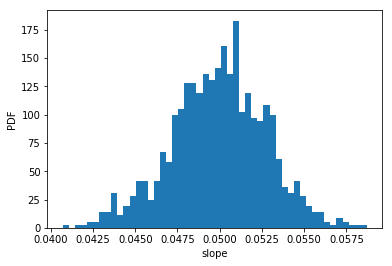

In [28]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Plotting bootstrap regressions</h1><p>A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. Do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as <code>bs_slope_reps</code> and <code>bs_intercept_reps</code>).</p></div></div></div>

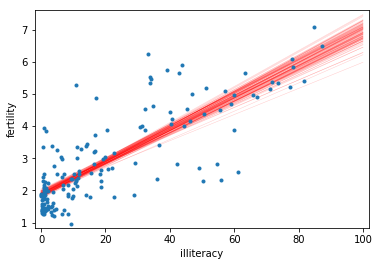

In [29]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

## <font color=red>03 - Introduction to hypothesis testing </font> 

 You now know how to define and estimate parameters given a model. But the question remains: how reasonable is it to observe your data if a model is true? This question is addressed by hypothesis tests. They are the icing on the inference cake. After completing this chapter, you will be able to carefully construct and test hypotheses using hacker statistics. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Generating a permutation sample</h1><p>In the video, you learned that permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets. </p>
<p>Remember, a permutation sample of two arrays having respectively <code>n1</code> and <code>n2</code> entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first <code>n1</code> entries as the permutation sample of the first array and the last <code>n2</code> entries as the permutation sample of the second array.</p></div></div></div>

In [30]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visualizing permutation sampling</h1><p>To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically. </p>
<p>We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in July (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs <em>would look if</em> they were identically distributed. </p>
<p>The data are stored in the Numpy arrays <code>rain_june</code> and <code>rain_november.</code></p>
<p>As a reminder, <code>permutation_sample()</code> has a function signature of <code>permutation_sample(data_1, data_2)</code> with a return value of <code>permuted_data[:len(data_1)], permuted_data[len(data_1):]</code>, where <code>permuted_data = np.random.permutation(np.concatenate((data_1, data_2)))</code>.</p></div></div></div>

In [31]:
rain_june = rain[rain.mm == 6].rain.values
rain_november = rain[rain.mm == 1].rain.values

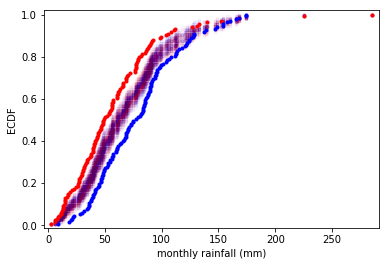

In [32]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. July and November rainfall are not identically distributed.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Generating permutation replicates</h1><p>As discussed in the video, a permutation replicate is a single value of a statistic computed from a permutation sample. As the <code>draw_bs_reps()</code> function <a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=6" target="_blank">you wrote in chapter 2</a> is useful for you to generate bootstrap replicates, it is useful to have a similar function, <code>draw_perm_reps()</code>, to generate permutation replicates. You will write this useful function in this exercise.</p>
<p>The function has call signature <code>draw_perm_reps(data_1, data_2, func, size=1)</code>. Importantly, <code>func</code> must be a function that takes <em>two</em> arrays as arguments. In most circumstances, <code>func</code> will be a function you write yourself.</p></div></div></div>

In [33]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Look before you leap: EDA before hypothesis testing</h1><p>Kleinteich and Gorb (<em>Sci. Rep.</em>, <strong>4</strong>, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.</p>
<p>Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, <code>df</code>, where column <code>ID</code> is the identity of the frog and column <code>impact_force</code> is the impact force in Newtons (N).</p></div></div></div>

In [34]:
frog_tongue = pd.read_csv('./data/frog_tongue.csv', skiprows=14)
df = frog_tongue[['ID', 'impact force (mN)']]
df['impact_force'] = df['impact force (mN)']/1000
df = df[(df['ID']=='II') | (df['ID']=='IV')][['ID', 'impact_force']]

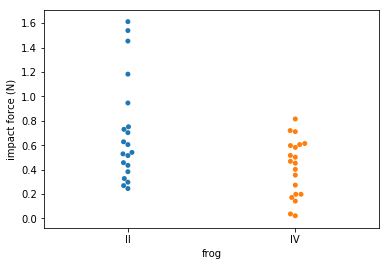

In [35]:
# Make bee swarm plot
_ = sns.swarmplot('ID', 'impact_force', data = df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

Eyeballing it, it does not look like they come from the same distribution. Frog A, the adult, has three or four very hard strikes, and Frog B, the juvenile, has a couple weak ones. However, it is possible that with only 20 samples it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Permutation test on frog data</h1><p>The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.</p>
<p>For your convenience, the data has been stored in the arrays <code>force_a</code> and <code>force_b</code>.</p></div></div></div>

In [36]:
force_a = df[df['ID']=='II']['impact_force'].values
force_b = df[df['ID']=='IV']['impact_force'].values

In [37]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

In [38]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates  >= empirical_diff_means ) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0058


The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant," but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">A one-sample bootstrap hypothesis test</h1><p>Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.</p>
<p>To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B <em>if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true</em>. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.</p></div></div></div>

In [39]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0046


The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">A two-sample bootstrap hypothesis test for difference of means</h1><p>We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.</p>
<p>To do the two-sample bootstrap test, we shift <em>both</em> arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.</p>
<p>The objects <code>forces_concat</code> and <code>empirical_diff_means</code> are already in your namespace.</p></div></div></div>

In [40]:
forces_concat = np.concatenate((force_a, force_b))
empirical_diff_means

0.28825000000000006

In [41]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a  - bs_replicates_b 

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0051


You got a similar result as when you did the permutation test. Nonetheless, remember that it is important to carefully think about what question you want to ask. Are you only interested in the mean impact force, or in the distribution of impact forces?

## <font color=red>04 - Hypothesis test examples </font> 

 You now know how to define and estimate parameters given a model. But the question remains: how reasonable is it to observe your data if a model is true? This question is addressed by hypothesis tests. They are the icing on the inference cake. After completing this chapter, you will be able to carefully construct and test hypotheses using hacker statistics. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">The vote for the Civil Rights Act in 1964</h1><p>The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?</p>
<p>To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as <em>small</em> as. In 1964, it was the <em>Democrats</em> who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.</p></div></div></div>

In [42]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">A time-on-website analog</h1><p>It turns out that you already did a hypothesis test analogous to an A/B test where you are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. Let's practice this again with something that actually is a before/after scenario.</p>
<p>We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays <code>nht_dead</code> and <code>nht_live</code>, where "nht" is meant to stand for "no-hitter time."</p>
<p>Since you will be using your <code>draw_perm_reps()</code> function in this exercise, it may be useful to remind yourself of its call signature: <code>draw_perm_reps(d1, d2, func, size=1)</code> or even <a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/introduction-to-hypothesis-testing?ex=7" target="_blank">referring back</a> to the chapter 3 exercise in which you defined it.</p></div></div></div>

In [43]:
games = pd.read_csv('./data/mlb_nohitters.csv')
games_list = games.game_number.values
nohitter_times_all = []
for i in range(1,len(games_list)):
    nohitter_times_all.append(games_list[i]-games_list[i-1]-1)
nohitter_times_all = np.array(nohitter_times_all)
nht_dead = nohitter_times_all[:90]
nht_live = nohitter_times_all[90:]

In [44]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, 10000)

# Compute and print the p-value: p
p = np.sum(perm_replicates<=nht_diff_obs)/len(perm_replicates)
print('p-val =',p)

p-val = 0.0001


Your p-value is 0.0001, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. Watch out, though, you could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Hypothesis test on Pearson correlation</h1><p>The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one. </p>
<p>The function <code>pearson_r()</code> that you <a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/quantitative-exploratory-data-analysis?ex=15" target="_blank">wrote in the prequel to this course</a> for computing the Pearson correlation coefficient is already in your name space.</p></div></div></div>

In [45]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [46]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0


You got a p-value of zero. In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Do neonicotinoid insecticides have unintended consequences?</h1><p>As a final exercise in hypothesis testing before we put everything together in our case study in the next chapter, you will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants. </p>
<p>In a recent study, Straub, et al. (<a href="http://dx.doi.org/10.1098/rspb.2016.0506" target="_blank"><em>Proc. Roy. Soc. B</em>, 2016</a>) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.</p>
<p>First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees (stored in the Numpy array <code>control</code>) and bees treated with pesticide (stored in the Numpy array <code>treated</code>).</p></div></div></div>

In [47]:
bee_sperm = pd.read_csv('./data/bee_sperm.csv', skiprows=3)
bee_sperm.head()

,Specimen,Treatment,Environment,TreatmentNCSS,Sample ID,Colony,Cage,Sample,Sperm Volume per 500 ul,Quantity,ViabilityRaw (%),Quality,Age (d),Infertil,AliveSperm,Quantity Millions,Alive Sperm Millions,Dead Sperm Millions
0,227,Control,Cage,1,C2-1-1,2,1,1,2150000,2150000,96.7263814616756,96.726381,14,0,2079617,2.1500,2.079617,0.070383
1,228,Control,Cage,1,C2-1-2,2,1,2,2287500,2287500,96.3498079760595,96.349808,14,0,2204001,2.2875,2.204001,0.083499
2,229,Control,Cage,1,C2-1-3,2,1,3,87500,87500,98.75,98.750000,14,0,86406,0.0875,0.086406,0.001094
3,230,Control,Cage,1,C2-1-4,2,1,4,1875000,1875000,93.2874208336941,93.287421,14,0,1749139,1.8750,1.749139,0.125861
4,231,Control,Cage,1,C2-1-5,2,1,5,1587500,1587500,97.7925061050061,97.792506,14,0,1552456,1.5875,1.552456,0.035044


In [48]:
treated = np.array([ 1.342686,  1.058476,  3.793784,  0.40428 ,  4.528388,  2.142966,3.937742,  0.1375  ,  6.919164,  0.      ,  3.597812,  5.196538,2.78955 ,  2.3229  ,  1.090636,  5.323916,  1.021618,  0.931836,2.78    ,  0.412202,  1.180934,  2.8674  ,  0.      ,  0.064354,3.008348,  0.876634,  0.      ,  4.971712,  7.280658,  4.79732 ,2.084956,  3.251514,  1.9405  ,  1.566192,  0.58894 ,  5.219658,0.977976,  3.124584,  1.297564,  1.433328,  4.24337 ,  0.880964,2.376566,  3.763658,  1.918426, 3.74 , 3.841726, 4.69964 , 4.386876, 0. , 1.127432, 1.845452, 0.690314, 4.185602, 2.284732, 7.237594, 2.185148, 2.799124, 3.43218 , 0.63354 , 1.142496, 0.586 , 2.372858, 1.80032 , 3.329306, 4.028804, 3.474156, 7.508752, 2.032824, 1.336556, 1.906496, 1.396046, 2.488104, 4.759114, 1.07853 , 3.19927 , 3.814252, 4.275962, 2.817056, 0.552198, 3.27194 , 5.11525 , 2.064628, 0. , 3.34101 , 6.177322, 0. , 3.66415 , 2.352582, 1.531696])
control = np.array([  4.159234,   4.408002,   0.172812,   3.498278,   3.104912,         5.164174,   6.615262,   4.633066,   0.170408,   2.65    ,         0.0875  ,   1.997148,   6.92668 ,   4.574932,   3.896466,         5.209814,   3.70625 ,   0.      ,   4.62545 ,   3.01444 ,         0.732652,   0.4     ,   6.518382,   5.225   ,   6.218742,         6.840358,   1.211308,   0.368252,   3.59937 ,   4.212158,         6.052364,   2.115532,   6.60413 ,   5.26074 ,   6.05695 ,         6.481172,   3.171522,   3.057228,   0.218808,   5.215112,         4.465168,   2.28909 ,   3.732572,   2.17087 ,   1.834326,         6.074862,   5.841978,   8.524892,   4.698492,   2.965624,         2.324206,   3.409412,   4.830726,   0.1     ,   0.      ,         4.101432,   3.478162,   1.009688,   4.999296,   4.32196 ,         0.299592,   3.606032,   7.54026 ,   4.284024,   0.057494,         6.036668,   2.924084,   4.150144,   1.256926,   4.666502,         4.806594,   2.52478 ,   2.027654,   2.52283 ,   4.735598,         2.033236,   0.      ,   6.177294,   2.601834,   3.544408,         3.6045  ,   5.520346,   4.80698 ,   3.002478,   3.559816,         7.075844,  10.      ,   0.139772,   6.17171 ,   3.201232,         8.459546,   0.17857 ,   7.088276,   5.496662,   5.415086,         1.932282,   3.02838 ,   7.47996 ,   1.86259 ,   7.838498,         2.242718,   3.292958,   6.363644,   4.386898,   8.47533 ,         4.156304,   1.463956,   4.533628,   5.573922,   1.29454 ,         7.547504,   3.92466 ,   5.820258,   4.118522,   4.125   ,         2.286698,   0.591882,   1.273124,   0.      ,   0.      ,         0.      ,  12.22502 ,   7.601604,   5.56798 ,   1.679914,         8.77096 ,   5.823942,   0.258374,   0.      ,   5.899236,         5.486354,   2.053148,   3.25541 ,   2.72564 ,   3.364066,         2.43427 ,   5.282548,   3.963666,   0.24851 ,   0.347916,         4.046862,   5.461436,   4.066104,   0.      ,   0.065   ])

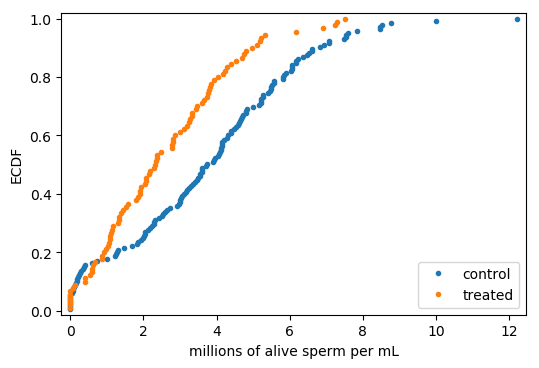

In [49]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

plt.figure(dpi = 100)
# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

The ECDFs show a pretty clear difference between the treatment and control; treated bees have fewer alive sperm. Let's now do a hypothesis test in the next exercise.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Bootstrap hypothesis test on bee sperm counts</h1><p>Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. You will use the difference of means as your test statistic.</p>
<p>For your reference, the call signature for the <code>draw_bs_reps()</code> function <a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=6" target="_blank">you wrote in chapter 2</a> is <code>draw_bs_reps(data, func, size=1)</code>.</p></div></div></div>

In [50]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


The p-value is small, most likely less than 0.0001, since you never saw a bootstrap replicated with a difference of means at least as extreme as what was observed. In fact, when I did the calculation with 10 million replicates, I got a p-value of <code>2e-05</code>.

## <font color=red>05 -Putting it all together: a case study </font> 

 You now know how to define and estimate parameters given a model. But the question remains: how reasonable is it to observe your data if a model is true? This question is addressed by hypothesis tests. They are the icing on the inference cake. After completing this chapter, you will be able to carefully construct and test hypotheses using hacker statistics. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">EDA of beak depths of Darwin's finches</h1><p>For your first foray into the Darwin finch data, you will study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species <em>Geospiza scandens</em> has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, <em>Geospiza fortis</em>. These effects can lead to changes in the species over time.</p>
<p>In the next few problems, you will look at the beak depth of <em>G. scandens</em> on Daphne Major in 1975 and in 2012. To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot. </p>
<p>The data are stored in a pandas DataFrame called <code>df</code> with columns <code>'year'</code> and <code>'beak_depth'</code>. The units of beak depth are millimeters (mm).</p></div></div></div>

In [51]:
finch_beaks_1975 = pd.read_csv('./data/finch_beaks_1975.csv')
finch_beaks_1975['year'] = 1975
finch_beaks_2012 = pd.read_csv('./data/finch_beaks_2012.csv')
finch_beaks_2012['year'] = 2012
scandens_1975 = finch_beaks_1975[finch_beaks_1975['species'] == 'scandens'][['Beak length, mm','Beak depth, mm', 'year']]
scandens_1975.columns = ['beak_length','beak_depth', 'year']
scandens_2012 = finch_beaks_2012[finch_beaks_2012['species'] == 'scandens'][['blength','bdepth', 'year']]
scandens_2012.columns = ['beak_length','beak_depth', 'year']
df = pd.concat((scandens_1975, scandens_2012)).reset_index()[['beak_length','beak_depth','year']]

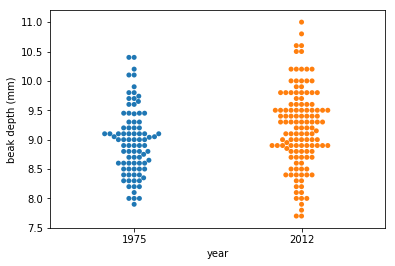

In [52]:
# Create bee swarm plot
_ = sns.swarmplot(x='year', y='beak_depth', data=df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">ECDFs of beak depths</h1><p>While bee swarm plots are useful, we found that ECDFs are often even better when doing EDA. Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot. </p>
<p>For your convenience, the beak depths for the respective years has been stored in the NumPy arrays <code>bd_1975</code> and <code>bd_2012</code>.</p></div></div></div>

In [53]:
bd_1975 = scandens_1975.beak_depth.values
bd_2012 = scandens_2012.beak_depth.values

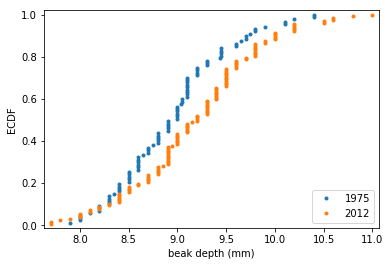

In [54]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
_ = plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Parameter estimates of beak depths</h1><p>Estimate the <em>difference</em> of the mean beak depth of the <em>G. scandens</em> samples from 1975 and 2012 and report a 95% confidence interval.</p>
<p>Since in this exercise you will use the <code>draw_bs_reps()</code> function you wrote in chapter 2, it may be helpful to <a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=6" target="_blank">refer back to it</a>.</p></div></div></div>

In [55]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06457765 0.39466651] mm


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Hypothesis test: Are beaks deeper in 2012?</h1><p>Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of <em>G. scandens</em> on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?</p>
<p>Be careful! The hypothesis we are testing is <em>not</em> that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.</p></div></div></div>

In [56]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0034


We get a p-value of 0.0038, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! In the previous exercise, you got a difference of 0.2 mm between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">EDA of beak length and depth</h1><p>The beak length data are stored as <code>bl_1975</code> and <code>bl_2012</code>, again with units of millimeters (mm). You still have the beak depth data stored in <code>bd_1975</code> and <code>bd_2012</code>. Make scatter plots of beak depth (y-axis) versus beak length (x-axis) for the 1975 and 2012 specimens.</p></div></div></div>

In [57]:
bl_1975 = scandens_1975.beak_length.values
bl_2012 = scandens_2012.beak_length.values

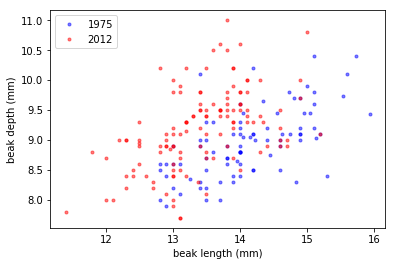

In [58]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Linear regressions</h1><p>Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.</p>
<p>You will use the <code>draw_bs_pairs_linreg()</code> function you <a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=12" target="_blank">wrote back in chapter 2</a>.</p>
<p>As a reminder, its call signature is <code>draw_bs_pairs_linreg(x, y, size=1)</code>, and it returns <code>bs_slope_reps</code> and <code>bs_intercept_reps</code>.</p></div>

In [59]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975,bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975,bd_1975,1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012,1000)


# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.46520516916059357 conf int = [0.33644307 0.58415049]
1975: intercept = 2.3908752365842285 conf int = [0.71280712 4.20183093]
2012: slope = 0.4626303588353126 conf int = [0.33524284 0.58295424]
2012: intercept = 2.9772474982360184 conf int = [1.36527662 4.67365371]


It looks like they have the same slope, but different intercepts.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Displaying the linear regression results</h1><p>Now, you will display your linear regression results on the scatter plot, the code for which is already pre-written for you from your previous exercise. To do this, take the first 100 bootstrap samples (stored in <code>bs_slope_reps_1975</code>, <code>bs_intercept_reps_1975</code>, <code>bs_slope_reps_2012</code>, and <code>bs_intercept_reps_2012</code>) and plot the lines with <code>alpha=0.2</code> and <code>linewidth=0.5</code> keyword arguments to <code>plt.plot()</code>.</p></div>

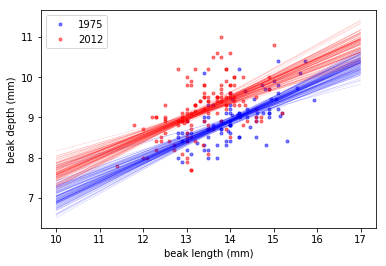

In [60]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Beak length to depth ratio</h1><p>The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the <em>ratio</em> of beak length to beak depth. Let's make that comparison. </p>
<p>Remember, the data are stored in <code>bd_1975</code>, <code>bd_2012</code>, <code>bl_1975</code>, and <code>bl_2012</code>.</p></div>

In [61]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55676527 1.60150159]
2012: mean ratio = 1.4658342276847767 conf int = [1.44442958 1.48795597]


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">How different is the ratio?</h1><p>In the previous exercise, you computed the mean beak length to depth ratio with 99% confidence intervals for 1975 and for 2012. The results of that calculation are shown graphically in the plot accompanying this problem. In addition to these results, what would you say about the ratio of beak length to depth?</p></div>

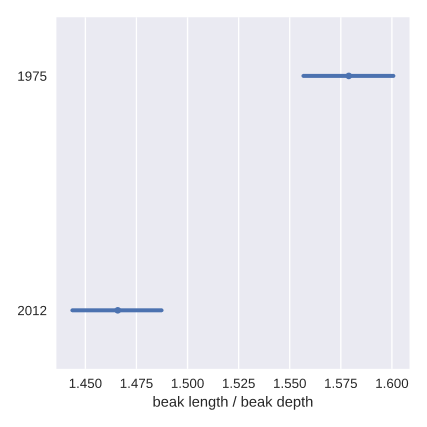

The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">EDA of heritability</h1><p>The array <code>bd_parent_scandens</code> contains the average beak depth (in mm) of two parents of the species <code>G. scandens</code>. The array <code>bd_offspring_scandens</code> contains the average beak depth of the offspring of the respective parents. The arrays <code>bd_parent_fortis</code> and <code>bd_offspring_fortis</code> contain the same information about measurements from <em>G. fortis</em> birds.</p>
<p>Make a scatter plot of the average offspring beak depth (y-axis) versus average parental beak depth (x-axis) for both species. Use the <code>alpha=0.5</code> keyword argument to help you see overlapping points.</p></div>

In [62]:
finch_beaks_1975

,band,species,"Beak length, mm","Beak depth, mm",year
0,2,fortis,9.40,8.00,1975
1,9,fortis,9.20,8.30,1975
2,12,fortis,9.50,7.50,1975
3,15,fortis,9.50,8.00,1975
4,305,fortis,11.50,9.90,1975
5,307,fortis,11.10,8.60,1975
6,308,fortis,9.90,8.40,1975
7,309,fortis,11.50,9.80,1975
8,311,fortis,10.80,9.20,1975
9,312,fortis,11.30,9.00,1975


In [63]:
bd_parent_scandens =np.array([8.3318,8.4035,8.5317,8.7202,8.7089,8.7541,8.773,8.8107,8.7919,8.8069,8.6523,8.6146,8.6938,8.7127,8.7466,8.7504,8.7805,8.7428,8.7164,8.8032,8.8258,8.856,8.9012,8.9125,8.8635,8.8258,8.8522,8.8974,8.9427,8.9879,8.9615,8.9238,8.9351,9.0143,9.0558,9.0596,8.9917,8.905,8.9314,8.9465,8.9879,8.9804,9.0219,9.052,9.0407,9.0407,8.9955,8.9992,8.9992,9.0747,9.0747,9.5385,9.4781,9.4517,9.3537,9.2707,9.1199,9.1689,9.1425,9.135,9.1011,9.1727,9.2217,9.2255,9.2821,9.3235,9.3198,9.3198,9.3198,9.3273,9.3725,9.3989,9.4253,9.4593,9.4442,9.4291,9.2632,9.2293,9.1878,9.1425,9.1275,9.1802,9.1765,9.2481,9.2481,9.1991,9.1689,9.1765,9.2406,9.3198,9.3235,9.1991,9.2971,9.2443,9.316,9.2934,9.3914,9.3989,9.5121,9.6176,9.5535,9.4668,9.3725,9.3348,9.3763,9.3839,9.4216,9.4065,9.3348,9.4442,9.4367,9.5083,9.448,9.4781,9.595,9.6101,9.5686,9.6365,9.7119,9.8213,9.825,9.7609,9.6516,9.5988,9.546,9.6516,9.7572,9.8854,10.0023,9.3914])
bd_offspring_scandens = np.array([8.419,9.2468,8.1532,8.0089,8.2215,8.3734,8.5025,8.6392,8.7684,8.8139,8.7911,8.9051,8.9203,8.8747,8.943,9.0038,8.981,9.0949,9.2696,9.1633,9.1785,9.1937,9.2772,9.0722,8.9658,8.9658,8.5025,8.4949,8.4949,8.5633,8.6013,8.6468,8.1532,8.3734,8.662,8.6924,8.7456,8.8367,8.8595,8.9658,8.9582,8.8671,8.8671,8.943,9.0646,9.1405,9.2089,9.2848,9.3759,9.4899,9.4519,8.1228,8.2595,8.3127,8.4949,8.6013,8.4646,8.5329,8.7532,8.8823,9.0342,8.6392,8.6772,8.6316,8.7532,8.8291,8.8975,8.9734,9.0494,9.1253,9.1253,9.1253,9.1785,9.2848,9.4595,9.3608,9.2089,9.2544,9.3684,9.3684,9.2316,9.1709,9.2316,9.0342,8.8899,8.8291,8.981,8.8975,10.4089,10.1886,9.7633,9.7329,9.6114,9.5051,9.5127,9.3684,9.6266,9.5354,10.0215,10.0215,9.6266,9.6038,9.4063,9.2316,9.338,9.262,9.262,9.4063,9.4367,9.0342,8.943,8.9203,8.7835,8.7835,9.057,8.9354,8.8975,8.8139,8.8671,9.0873,9.2848,9.2392,9.2924,9.4063,9.3152,9.4899,9.5962,9.6873,9.5203,9.6646])
bd_parent_fortis = np.array([10.1,9.55,9.4,10.25,10.125,9.7,9.05,7.4,9.,8.65,9.625,9.9,9.55,9.05,8.35,10.1,10.1,9.9,10.225,10.,10.55,10.45,9.2,10.2,8.95,10.05,10.2,9.5,9.925,9.95,10.05,8.75,9.2,10.15,9.8,10.7,10.5,9.55,10.55,10.475,8.65,10.7,9.1,9.4,10.3,9.65,9.5,9.7,10.525,9.95,10.1,9.75,10.05,9.9,10.,9.1,9.45,9.25,9.5,10.,10.525,9.9,10.4,8.95,9.4,10.95,10.75,10.1,8.05,9.1,9.55,9.05,10.2,10.,10.55,10.75,8.175,9.7,8.8,10.75,9.3,9.7,9.6,9.75,9.6,10.45,11.,10.85,10.15,10.35,10.4,9.95,9.1,10.1,9.85,9.625,9.475,9.,9.25,9.1,9.25,9.2,9.95,8.65,9.8,9.4,9.,8.55,8.75,9.65,8.95,9.15,9.85,10.225,9.825,10.,9.425,10.4,9.875,8.95,8.9,9.35,10.425,10.,10.175,9.875,9.875,9.15,9.45,9.025,9.7,9.7,10.05,10.3,9.6,10.,9.8,10.05,8.75,10.55,9.7,10.,9.85,9.8,9.175,9.65,9.55,9.9,11.55,11.3,10.4,10.8,9.8,10.45,10.,10.75,9.35,10.75,9.175,9.65,8.8,10.55,10.675,9.95,9.55,8.825,9.7,9.85,9.8,9.55,9.275,10.325,9.15,9.35,9.15,9.65,10.575,9.975,9.55,9.2,9.925,9.2,9.3,8.775,9.325,9.175,9.325,8.975,9.7,9.5,10.225,10.025,8.2,8.2,9.55,9.05,9.6,9.6,10.15,9.875,10.485,11.485,10.985,9.7,9.65,9.35,10.05,10.1,9.9,8.95,9.3,9.95,9.45,9.5,8.45,8.8,8.525,9.375,10.2,7.625,8.375,9.25,9.4,10.55,8.9,8.8,9.,8.575,8.575,9.6,9.375,9.6,9.95,9.6,10.2,9.85,9.625,9.025,10.375,10.25,9.3,9.5,9.55,8.55,9.05,9.9,9.8,9.75,10.25,9.1,9.65,10.3,8.9,9.95,9.5,9.775,9.425,7.75,7.55,9.1,9.6,9.575,8.95,9.65,9.65,9.65,9.525,9.85,9.05,9.3,8.9,9.45,10.,9.85,9.25,10.1,9.125,9.65,9.1,8.05,7.4,8.85,9.075,9.,9.7,8.7,9.45,9.7,8.35,8.85,9.7,9.45,10.3,10.,10.45,9.45,8.5,8.3,10.,9.225,9.75,9.15,9.55,9.,9.275,9.35,8.95,9.875,8.45,8.6,9.7,8.55,9.05,9.6,8.65,9.2,8.95,9.6,9.15,9.4,8.95,9.95,10.55,9.7,8.85,8.8,10.,9.05,8.2,8.1,7.25,8.3,9.15,8.6,9.5,8.05,9.425,9.3,9.8,9.3,9.85,9.5,8.65,9.825,9.,10.45,9.1,9.55,9.05,10.,9.35,8.375,8.3,8.8,10.1,9.5,9.75,10.1,9.575,9.425,9.65,8.725,9.025,8.5,8.95,9.3,8.85,8.95,9.8,9.5,8.65,9.1,9.4,8.475,9.35,7.95,9.35,8.575,9.05,8.175,9.85,7.85,9.85,10.1,9.35,8.85,8.75,9.625,9.25,9.55,10.325,8.55,9.675,9.15,9.,9.65,8.6,8.8,9.,9.95,8.4,9.35,10.3,9.05,9.975,9.975,8.65,8.725,8.2,7.85,8.775,8.5,9.4])
bd_offspring_fortis = np.array([10.7,9.78,9.48,9.6,10.27,9.5,9.,7.46,7.65,8.63,9.81,9.4,9.48,8.75,7.6,10.,10.09,9.74,9.64,8.49,10.15,10.28,9.2,10.01,9.03,9.94,10.5,9.7,10.02,10.04,9.43,8.1,9.5,9.9,9.48,10.18,10.16,9.08,10.39,9.9,8.4,10.6,8.75,9.46,9.6,9.6,9.95,10.05,10.16,10.1,9.83,9.46,9.7,9.82,10.34,8.02,9.65,9.87,9.,11.14,9.25,8.14,10.23,8.7,9.8,10.54,11.19,9.85,8.1,9.3,9.34,9.19,9.52,9.36,8.8,8.6,8.,8.5,8.3,10.38,8.54,8.94,10.,9.76,9.45,9.89,10.9,9.91,9.39,9.86,9.74,9.9,9.09,9.69,10.24,8.9,9.67,8.93,9.3,8.67,9.15,9.23,9.59,9.03,9.58,8.97,8.57,8.47,8.71,9.21,9.13,8.5,9.58,9.21,9.6,9.32,8.7,10.46,9.29,9.24,9.45,9.35,10.19,9.91,9.18,9.89,9.6,10.3,9.45,8.79,9.2,8.8,9.69,10.61,9.6,9.9,9.26,10.2,8.79,9.28,8.83,9.76,10.2,9.43,9.4,9.9,9.5,8.95,9.98,9.72,9.86,11.1,9.14,10.49,9.75,10.35,9.73,9.83,8.69,9.58,8.42,9.25,10.12,9.31,9.99,8.59,8.74,8.79,9.6,9.52,8.93,10.23,9.35,9.35,9.09,9.04,9.75,10.5,9.09,9.05,9.54,9.3,9.06,8.7,9.32,8.4,8.67,8.6,9.53,9.77,9.65,9.43,8.35,8.26,9.5,8.6,9.57,9.14,10.79,8.91,9.93,10.7,9.3,9.93,9.51,9.44,10.05,10.13,9.24,8.21,8.9,9.34,8.77,9.4,8.82,8.83,8.6,9.5,10.2,8.09,9.07,9.29,9.1,10.19,9.25,8.98,9.02,8.6,8.25,8.7,9.9,9.65,9.45,9.38,10.4,9.96,9.46,8.26,10.05,8.92,9.5,9.43,8.97,8.44,8.92,10.3,8.4,9.37,9.91,10.,9.21,9.95,8.84,9.82,9.5,10.29,8.4,8.31,9.29,8.86,9.4,9.62,8.62,8.3,9.8,8.48,9.61,9.5,9.37,8.74,9.31,9.5,9.49,9.74,9.2,9.24,9.7,9.64,9.2,7.5,7.5,8.7,8.31,9.,9.74,9.31,10.5,9.3,8.12,9.34,9.72,9.,9.65,9.9,10.,10.1,8.,9.07,9.75,9.33,8.11,9.36,9.74,9.9,9.23,9.7,8.2,9.35,9.49,9.34,8.87,9.03,9.07,9.43,8.2,9.19,9.,9.2,9.06,9.81,8.89,9.4,10.45,9.64,9.03,8.71,9.91,8.33,8.2,7.83,7.14,8.91,9.18,8.8,9.9,7.73,9.25,8.7,9.5,9.3,9.05,10.18,8.85,9.24,9.15,9.98,8.77,9.8,8.65,10.,8.81,8.01,7.9,9.41,10.18,9.55,9.08,8.4,9.75,8.9,9.07,9.35,8.9,8.19,8.65,9.19,8.9,9.28,10.58,9.,9.4,8.91,9.93,10.,9.37,7.4,9.,8.8,9.18,8.3,10.08,7.9,9.96,10.4,9.65,8.8,8.65,9.7,9.23,9.43,9.93,8.47,9.55,9.28,8.85,8.9,8.75,8.63,9.,9.43,8.28,9.23,10.4,9.,9.8,9.77,8.97,8.37,7.7,7.9,9.5,8.2,8.8])

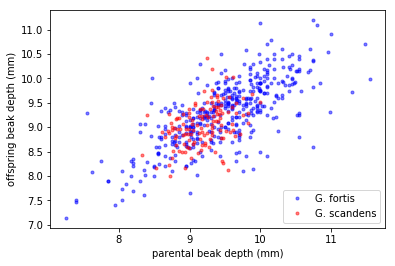

In [64]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)


# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()

It appears as though there is a stronger correlation in G. fortis than in G. scandens. This suggests that beak depth is more strongly inherited in G. fortis. We'll quantify this correlation next.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Correlation of offspring and parental data</h1><p>In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap. </p>
<p>You have <a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/bootstrap-confidence-intervals?ex=12" target="_blank">already written</a> a function to do pairs bootstrap to get estimates for parameters derived from linear regression. Your task in this exercise is to make a new function with call signature <code>draw_bs_pairs(x, y, func, size=1)</code> that performs pairs bootstrap and computes a single statistic on pairs samples defined. The statistic of interested in computed by calling <code>func(bs_x, bs_y)</code>. In the next exercise, you will use <code>pearson_r</code> for <code>func</code>.</p></div></div></div>

In [65]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y =  x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Pearson correlation of offspring and parental data</h1><p>The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for <em>G. scandens</em>. Do the same for <em>G. fortis</em>. Then, use the function you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap. </p>
<p>Remember, the data are stored in <code>bd_parent_scandens</code>, <code>bd_offspring_scandens</code>, <code>bd_parent_fortis</code>, and <code>bd_offspring_fortis</code>.</p></div></div></div>

In [66]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.41170636294012586 [0.27689727 0.54475941]
G. fortis: 0.7283412395518486 [0.66902404 0.78156426]


It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is more strongly correlated with their offspring than their G. scandens counterparts.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Measuring heritability</h1><p>Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the <em>variance of the parents alone</em>. In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.</p>
<p>This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.</p>
<p>Remember, the data are stored in <code>bd_parent_scandens</code>, <code>bd_offspring_scandens</code>, <code>bd_parent_fortis</code>, and <code>bd_offspring_fortis</code>.</p></div></div></div>

In [67]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens,
                                     bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis,
                                   bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.5485340868685983 [0.35220855 0.74767793]
G. fortis: 0.7229051911438156 [0.64465707 0.79127911]


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Is beak depth heritable at all in G. scandens?</h1><p>The heritability of beak depth in <em>G. scandens</em> seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. You will test that hypothesis here. To do this, you will do a pairs permutation test.</p></div></div></div>

In [68]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted,
                                      bd_offspring_scandens)

# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0


You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis. If you like, you can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.